In [49]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['cement-train-test-data']


In [50]:

#Importign libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import keras

In [51]:
#Importing the Dataset
df = pd.read_csv('../input/cement-train-test-data/train_data.csv')

# df = pd.concat([pd.read_csv('../input/cement-train-test-data/train_data.csv'),pd.read_csv('../input/cement-train-test-data/compresive_strength_concrete.csv'),pd.read_csv('../input/cement-train-test-data/train_data2.csv')])
# df = pd.concat([pd.read_csv('../input/cement-train-test-data/compresive_strength_concrete.csv'),pd.read_csv('../input/cement-train-test-data/train_data2.csv')])
x_org = df.drop('strength',axis=1).values
y_org = df['strength'].values

In [52]:
# Using Test/Train Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.22)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_trans form(X_train)
X_test = sc.transform(X_test)


In [53]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(562, 8) (159, 8) (562,) (159,)


In [54]:
# Building ANN As a Regressor
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization
from keras import backend


In [55]:
#Defining Root Mean Square Error As our Metric Function 
def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))



In [56]:
#Building  first layer Layers 
model=Sequential()

model.add(Dense(64,input_dim=8,activation = 'relu'))

# Bulding Second and third layer
model.add(Dense(32,activation='relu'))
model.add(keras.layers.normalization.BatchNormalization())

# Output Layer
model.add(Dense(1,activation='linear'))



?? model.fit

In [57]:
# Optimize , Compile And Train The Model 
opt = keras.optimizers.Adam(lr=0.0009)

model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse,'accuracy'])
history1 = model.fit(X_train,y_train,epochs = 200 ,batch_size=32,validation_data=(X_test,y_test))

Train on 562 samples, validate on 159 samples
Epoch 1/200
562/562 [==============================] - 1s 943us/step - loss: 1602.1874 - rmse: 36.3475 - accuracy: 0.0000e+00 - val_loss: 1474.4794 - val_rmse: 34.0692 - val_accuracy: 0.0000e+00
Epoch 2/200
562/562 [==============================] - 0s 162us/step - loss: 1553.1534 - rmse: 36.2157 - accuracy: 0.0000e+00 - val_loss: 1458.8065 - val_rmse: 33.9743 - val_accuracy: 0.0000e+00
Epoch 3/200
562/562 [==============================] - 0s 151us/step - loss: 1515.7154 - rmse: 36.0708 - accuracy: 0.0000e+00 - val_loss: 1440.9401 - val_rmse: 33.8749 - val_accuracy: 0.0000e+00
Epoch 4/200
562/562 [==============================] - 0s 143us/step - loss: 1480.5260 - rmse: 35.9033 - accuracy: 0.0000e+00 - val_loss: 1423.7447 - val_rmse: 33.8127 - val_accuracy: 0.0000e+00
Epoch 5/200
562/562 [==============================] - 0s 141us/step - loss: 1445.8549 - rmse: 35.7073 - accuracy: 0.0000e+00 - val_loss: 1407.5442 - val_rmse: 33.8072 - val_

Epoch 43/200
562/562 [==============================] - 0s 146us/step - loss: 147.9430 - rmse: 11.4030 - accuracy: 0.0000e+00 - val_loss: 146.5665 - val_rmse: 10.8412 - val_accuracy: 0.0000e+00
Epoch 44/200
562/562 [==============================] - 0s 139us/step - loss: 131.3575 - rmse: 10.6678 - accuracy: 0.0000e+00 - val_loss: 123.9154 - val_rmse: 9.7940 - val_accuracy: 0.0063
Epoch 45/200
562/562 [==============================] - 0s 187us/step - loss: 121.7297 - rmse: 10.0837 - accuracy: 0.0000e+00 - val_loss: 110.1659 - val_rmse: 9.1597 - val_accuracy: 0.0000e+00
Epoch 46/200
562/562 [==============================] - 0s 158us/step - loss: 103.6322 - rmse: 9.2767 - accuracy: 0.0000e+00 - val_loss: 109.8143 - val_rmse: 9.1160 - val_accuracy: 0.0000e+00
Epoch 47/200
562/562 [==============================] - 0s 140us/step - loss: 98.7246 - rmse: 8.7865 - accuracy: 0.0000e+00 - val_loss: 102.3897 - val_rmse: 8.5458 - val_accuracy: 0.0000e+00
Epoch 48/200
562/562 [===================

Epoch 87/200
562/562 [==============================] - 0s 145us/step - loss: 18.9117 - rmse: 3.3231 - accuracy: 0.0036 - val_loss: 30.9167 - val_rmse: 3.8320 - val_accuracy: 0.0000e+00
Epoch 88/200
562/562 [==============================] - 0s 141us/step - loss: 19.6785 - rmse: 3.4540 - accuracy: 0.0000e+00 - val_loss: 28.0278 - val_rmse: 3.5513 - val_accuracy: 0.0063
Epoch 89/200
562/562 [==============================] - 0s 141us/step - loss: 16.3645 - rmse: 3.0327 - accuracy: 0.0018 - val_loss: 30.5783 - val_rmse: 3.7951 - val_accuracy: 0.0000e+00
Epoch 90/200
562/562 [==============================] - 0s 152us/step - loss: 17.4806 - rmse: 3.1186 - accuracy: 0.0036 - val_loss: 30.1168 - val_rmse: 3.8165 - val_accuracy: 0.0063
Epoch 91/200
562/562 [==============================] - 0s 155us/step - loss: 16.8867 - rmse: 3.2420 - accuracy: 0.0018 - val_loss: 28.1781 - val_rmse: 3.6157 - val_accuracy: 0.0063
Epoch 92/200
562/562 [==============================] - 0s 157us/step - loss: 

Epoch 131/200
562/562 [==============================] - 0s 147us/step - loss: 15.1049 - rmse: 2.9045 - accuracy: 0.0018 - val_loss: 29.9326 - val_rmse: 3.7261 - val_accuracy: 0.0000e+00
Epoch 132/200
562/562 [==============================] - 0s 143us/step - loss: 14.1558 - rmse: 2.8066 - accuracy: 0.0000e+00 - val_loss: 29.0519 - val_rmse: 3.6717 - val_accuracy: 0.0000e+00
Epoch 133/200
562/562 [==============================] - 0s 153us/step - loss: 20.8547 - rmse: 3.5969 - accuracy: 0.0018 - val_loss: 27.6991 - val_rmse: 3.5928 - val_accuracy: 0.0063
Epoch 134/200
562/562 [==============================] - 0s 143us/step - loss: 17.4648 - rmse: 3.1830 - accuracy: 0.0036 - val_loss: 30.0779 - val_rmse: 3.6868 - val_accuracy: 0.0063
Epoch 135/200
562/562 [==============================] - 0s 139us/step - loss: 17.5349 - rmse: 3.2318 - accuracy: 0.0018 - val_loss: 29.0971 - val_rmse: 3.6743 - val_accuracy: 0.0000e+00
Epoch 136/200
562/562 [==============================] - 0s 144us/ste

Epoch 175/200
562/562 [==============================] - 0s 149us/step - loss: 14.5964 - rmse: 2.8207 - accuracy: 0.0000e+00 - val_loss: 29.2277 - val_rmse: 3.6632 - val_accuracy: 0.0063
Epoch 176/200
562/562 [==============================] - 0s 144us/step - loss: 13.4619 - rmse: 2.8640 - accuracy: 0.0018 - val_loss: 28.7719 - val_rmse: 3.6359 - val_accuracy: 0.0063
Epoch 177/200
562/562 [==============================] - 0s 145us/step - loss: 17.3602 - rmse: 3.3278 - accuracy: 0.0036 - val_loss: 28.8772 - val_rmse: 3.6762 - val_accuracy: 0.0000e+00
Epoch 178/200
562/562 [==============================] - 0s 151us/step - loss: 19.2059 - rmse: 3.4474 - accuracy: 0.0018 - val_loss: 28.8495 - val_rmse: 3.6483 - val_accuracy: 0.0000e+00
Epoch 179/200
562/562 [==============================] - 0s 149us/step - loss: 14.2182 - rmse: 2.8341 - accuracy: 0.0036 - val_loss: 30.8469 - val_rmse: 3.7549 - val_accuracy: 0.0000e+00
Epoch 180/200
562/562 [==============================] - 0s 140us/ste

# train again

In [58]:
df = pd.concat([pd.read_csv('../input/cement-train-test-data/train_data.csv'),pd.read_csv('../input/cement-train-test-data/compresive_strength_concrete.csv'),pd.read_csv('../input/cement-train-test-data/train_data2.csv')])

x_org = df.drop('strength',axis=1).values
y_org = df['strength'].values

X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.22)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2169, 8) (612, 8) (2169,) (612,)


In [59]:
model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse,'accuracy'])
history2 = model.fit(X_train,y_train,epochs = 200 ,batch_size=32,validation_data=(X_test,y_test))

Train on 2169 samples, validate on 612 samples
Epoch 1/200
2169/2169 [==============================] - 1s 271us/step - loss: 33.9488 - rmse: 4.4647 - accuracy: 0.0014 - val_loss: 57.1469 - val_rmse: 5.8116 - val_accuracy: 0.0016
Epoch 2/200
2169/2169 [==============================] - 0s 146us/step - loss: 27.5028 - rmse: 4.0165 - accuracy: 0.0014 - val_loss: 22.0085 - val_rmse: 3.6251 - val_accuracy: 0.0033
Epoch 3/200
2169/2169 [==============================] - 0s 142us/step - loss: 23.5755 - rmse: 3.7272 - accuracy: 0.0014 - val_loss: 20.9309 - val_rmse: 3.3502 - val_accuracy: 0.0016
Epoch 4/200
2169/2169 [==============================] - 0s 144us/step - loss: 23.2859 - rmse: 3.7517 - accuracy: 4.6104e-04 - val_loss: 18.1165 - val_rmse: 3.1521 - val_accuracy: 0.0033
Epoch 5/200
2169/2169 [==============================] - 0s 138us/step - loss: 23.0578 - rmse: 3.7304 - accuracy: 0.0014 - val_loss: 16.7344 - val_rmse: 2.9889 - val_accuracy: 0.0033
Epoch 6/200
2169/2169 [===========

Epoch 45/200
2169/2169 [==============================] - 0s 145us/step - loss: 14.4072 - rmse: 2.9448 - accuracy: 9.2208e-04 - val_loss: 9.9003 - val_rmse: 2.1823 - val_accuracy: 0.0033
Epoch 46/200
2169/2169 [==============================] - 0s 168us/step - loss: 14.3618 - rmse: 2.9618 - accuracy: 0.0014 - val_loss: 10.4822 - val_rmse: 2.1437 - val_accuracy: 0.0049
Epoch 47/200
2169/2169 [==============================] - 0s 146us/step - loss: 14.7994 - rmse: 3.0149 - accuracy: 4.6104e-04 - val_loss: 10.0905 - val_rmse: 2.1878 - val_accuracy: 0.0016
Epoch 48/200
2169/2169 [==============================] - 0s 138us/step - loss: 17.3489 - rmse: 3.2811 - accuracy: 9.2208e-04 - val_loss: 12.4185 - val_rmse: 2.5938 - val_accuracy: 0.0033
Epoch 49/200
2169/2169 [==============================] - 0s 147us/step - loss: 15.1281 - rmse: 3.0105 - accuracy: 4.6104e-04 - val_loss: 12.3407 - val_rmse: 2.4582 - val_accuracy: 0.0000e+00
Epoch 50/200
2169/2169 [==============================] - 0s 

Epoch 89/200
2169/2169 [==============================] - 0s 137us/step - loss: 10.4961 - rmse: 2.4899 - accuracy: 0.0014 - val_loss: 8.2483 - val_rmse: 1.8573 - val_accuracy: 0.0016
Epoch 90/200
2169/2169 [==============================] - 0s 142us/step - loss: 14.0677 - rmse: 2.8869 - accuracy: 0.0018 - val_loss: 10.1165 - val_rmse: 1.9564 - val_accuracy: 0.0016
Epoch 91/200
2169/2169 [==============================] - 0s 151us/step - loss: 12.5504 - rmse: 2.7853 - accuracy: 0.0018 - val_loss: 9.4261 - val_rmse: 1.9702 - val_accuracy: 0.0016
Epoch 92/200
2169/2169 [==============================] - 0s 142us/step - loss: 13.5286 - rmse: 2.8769 - accuracy: 0.0014 - val_loss: 8.6691 - val_rmse: 1.8789 - val_accuracy: 0.0049
Epoch 93/200
2169/2169 [==============================] - 0s 146us/step - loss: 13.7860 - rmse: 2.8838 - accuracy: 4.6104e-04 - val_loss: 8.3998 - val_rmse: 1.8565 - val_accuracy: 0.0000e+00
Epoch 94/200
2169/2169 [==============================] - 0s 142us/step - lo

2169/2169 [==============================] - 0s 135us/step - loss: 14.6706 - rmse: 3.0205 - accuracy: 0.0014 - val_loss: 8.8760 - val_rmse: 2.0167 - val_accuracy: 0.0049
Epoch 134/200
2169/2169 [==============================] - 0s 140us/step - loss: 12.4064 - rmse: 2.6307 - accuracy: 9.2208e-04 - val_loss: 7.7077 - val_rmse: 1.7403 - val_accuracy: 0.0016
Epoch 135/200
2169/2169 [==============================] - 0s 140us/step - loss: 11.8212 - rmse: 2.6544 - accuracy: 0.0041 - val_loss: 8.3622 - val_rmse: 1.9215 - val_accuracy: 0.0033
Epoch 136/200
2169/2169 [==============================] - 0s 146us/step - loss: 13.0758 - rmse: 2.8553 - accuracy: 0.0018 - val_loss: 8.7875 - val_rmse: 1.8786 - val_accuracy: 0.0065
Epoch 137/200
2169/2169 [==============================] - 0s 143us/step - loss: 10.9908 - rmse: 2.5621 - accuracy: 0.0028 - val_loss: 8.7037 - val_rmse: 1.8457 - val_accuracy: 0.0049
Epoch 138/200
2169/2169 [==============================] - 0s 143us/step - loss: 14.7877 -

2169/2169 [==============================] - 0s 133us/step - loss: 13.6078 - rmse: 2.9253 - accuracy: 0.0014 - val_loss: 7.3802 - val_rmse: 1.6531 - val_accuracy: 0.0033
Epoch 178/200
2169/2169 [==============================] - 0s 165us/step - loss: 13.8338 - rmse: 2.9430 - accuracy: 0.0014 - val_loss: 7.8606 - val_rmse: 1.6569 - val_accuracy: 0.0049
Epoch 179/200
2169/2169 [==============================] - 0s 203us/step - loss: 10.3124 - rmse: 2.4382 - accuracy: 0.0018 - val_loss: 8.9605 - val_rmse: 1.9221 - val_accuracy: 0.0000e+00
Epoch 180/200
2169/2169 [==============================] - 0s 144us/step - loss: 12.1945 - rmse: 2.7105 - accuracy: 0.0023 - val_loss: 7.7492 - val_rmse: 1.6665 - val_accuracy: 0.0049
Epoch 181/200
2169/2169 [==============================] - 0s 149us/step - loss: 10.9736 - rmse: 2.6171 - accuracy: 9.2208e-04 - val_loss: 6.9602 - val_rmse: 1.6213 - val_accuracy: 0.0000e+00
Epoch 182/200
2169/2169 [==============================] - 0s 150us/step - loss: 1

# train again

In [60]:
df = pd.concat([pd.read_csv('../input/cement-train-test-data/compresive_strength_concrete.csv'),pd.read_csv('../input/cement-train-test-data/train_data2.csv')])

x_org = df.drop('strength',axis=1).values
y_org = df['strength'].values

X_train, X_test, y_train, y_test = train_test_split(x_org,y_org, test_size=0.22)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1606, 8) (454, 8) (1606,) (454,)


In [61]:
model.compile(optimizer=opt,loss='mean_squared_error',metrics=[rmse,'accuracy'])
history3 = model.fit(X_train,y_train,epochs = 200 ,batch_size=32,validation_data=(X_test,y_test))

Train on 1606 samples, validate on 454 samples
Epoch 1/200
1606/1606 [==============================] - 1s 330us/step - loss: 24.9364 - rmse: 3.7945 - accuracy: 0.0000e+00 - val_loss: 34.8644 - val_rmse: 4.6427 - val_accuracy: 0.0000e+00
Epoch 2/200
1606/1606 [==============================] - 0s 140us/step - loss: 22.2799 - rmse: 3.6169 - accuracy: 0.0019 - val_loss: 31.0306 - val_rmse: 4.2076 - val_accuracy: 0.0000e+00
Epoch 3/200
1606/1606 [==============================] - 0s 137us/step - loss: 20.4757 - rmse: 3.4571 - accuracy: 0.0012 - val_loss: 11.8311 - val_rmse: 2.5959 - val_accuracy: 0.0044
Epoch 4/200
1606/1606 [==============================] - 0s 140us/step - loss: 18.1773 - rmse: 3.2303 - accuracy: 6.2266e-04 - val_loss: 11.0329 - val_rmse: 2.3911 - val_accuracy: 0.0022
Epoch 5/200
1606/1606 [==============================] - 0s 139us/step - loss: 18.6807 - rmse: 3.4363 - accuracy: 0.0019 - val_loss: 10.2254 - val_rmse: 2.3682 - val_accuracy: 0.0000e+00
Epoch 6/200
1606/1

1606/1606 [==============================] - 0s 170us/step - loss: 14.8403 - rmse: 3.0049 - accuracy: 0.0012 - val_loss: 6.1840 - val_rmse: 1.7795 - val_accuracy: 0.0000e+00
Epoch 45/200
1606/1606 [==============================] - 0s 143us/step - loss: 14.9365 - rmse: 2.9551 - accuracy: 0.0012 - val_loss: 6.8056 - val_rmse: 1.8108 - val_accuracy: 0.0000e+00
Epoch 46/200
1606/1606 [==============================] - 0s 187us/step - loss: 17.5781 - rmse: 3.3187 - accuracy: 0.0000e+00 - val_loss: 5.1533 - val_rmse: 1.6198 - val_accuracy: 0.0044
Epoch 47/200
1606/1606 [==============================] - 0s 143us/step - loss: 13.1662 - rmse: 2.7783 - accuracy: 0.0012 - val_loss: 7.6775 - val_rmse: 1.8839 - val_accuracy: 0.0000e+00
Epoch 48/200
1606/1606 [==============================] - 0s 162us/step - loss: 13.8687 - rmse: 2.8817 - accuracy: 0.0012 - val_loss: 6.4761 - val_rmse: 1.7470 - val_accuracy: 0.0000e+00
Epoch 49/200
1606/1606 [==============================] - 0s 162us/step - loss

1606/1606 [==============================] - 0s 150us/step - loss: 13.0863 - rmse: 2.7882 - accuracy: 6.2266e-04 - val_loss: 6.3021 - val_rmse: 1.8706 - val_accuracy: 0.0022
Epoch 89/200
1606/1606 [==============================] - 0s 143us/step - loss: 19.7695 - rmse: 3.3846 - accuracy: 0.0012 - val_loss: 6.1393 - val_rmse: 1.7627 - val_accuracy: 0.0000e+00
Epoch 90/200
1606/1606 [==============================] - 0s 141us/step - loss: 13.7649 - rmse: 2.9357 - accuracy: 0.0012 - val_loss: 4.8943 - val_rmse: 1.5306 - val_accuracy: 0.0044
Epoch 91/200
1606/1606 [==============================] - 0s 141us/step - loss: 11.8514 - rmse: 2.6712 - accuracy: 0.0012 - val_loss: 6.2509 - val_rmse: 1.8463 - val_accuracy: 0.0000e+00
Epoch 92/200
1606/1606 [==============================] - 0s 142us/step - loss: 11.9785 - rmse: 2.7463 - accuracy: 0.0000e+00 - val_loss: 6.3889 - val_rmse: 1.8079 - val_accuracy: 0.0022
Epoch 93/200
1606/1606 [==============================] - 0s 152us/step - loss: 16

Epoch 132/200
1606/1606 [==============================] - 0s 142us/step - loss: 14.9493 - rmse: 2.9609 - accuracy: 6.2266e-04 - val_loss: 4.8207 - val_rmse: 1.5294 - val_accuracy: 0.0044
Epoch 133/200
1606/1606 [==============================] - 0s 140us/step - loss: 10.3821 - rmse: 2.4167 - accuracy: 0.0037 - val_loss: 5.5636 - val_rmse: 1.5972 - val_accuracy: 0.0000e+00
Epoch 134/200
1606/1606 [==============================] - 0s 139us/step - loss: 13.5421 - rmse: 2.7828 - accuracy: 6.2266e-04 - val_loss: 5.8193 - val_rmse: 1.7339 - val_accuracy: 0.0088
Epoch 135/200
1606/1606 [==============================] - 0s 153us/step - loss: 15.2330 - rmse: 3.0229 - accuracy: 0.0000e+00 - val_loss: 5.2728 - val_rmse: 1.5526 - val_accuracy: 0.0022
Epoch 136/200
1606/1606 [==============================] - 0s 160us/step - loss: 11.3889 - rmse: 2.5161 - accuracy: 0.0025 - val_loss: 6.0674 - val_rmse: 1.7126 - val_accuracy: 0.0044
Epoch 137/200
1606/1606 [==============================] - 0s 14

Epoch 176/200
1606/1606 [==============================] - 0s 143us/step - loss: 12.2690 - rmse: 2.7685 - accuracy: 0.0000e+00 - val_loss: 5.1366 - val_rmse: 1.5715 - val_accuracy: 0.0022
Epoch 177/200
1606/1606 [==============================] - 0s 159us/step - loss: 12.4750 - rmse: 2.7382 - accuracy: 6.2266e-04 - val_loss: 6.3174 - val_rmse: 1.6386 - val_accuracy: 0.0066
Epoch 178/200
1606/1606 [==============================] - 0s 151us/step - loss: 12.8253 - rmse: 2.7229 - accuracy: 6.2266e-04 - val_loss: 5.4365 - val_rmse: 1.5378 - val_accuracy: 0.0022
Epoch 179/200
1606/1606 [==============================] - 0s 144us/step - loss: 12.1001 - rmse: 2.6812 - accuracy: 0.0000e+00 - val_loss: 5.3630 - val_rmse: 1.5215 - val_accuracy: 0.0000e+00
Epoch 180/200
1606/1606 [==============================] - 0s 164us/step - loss: 14.4693 - rmse: 2.8730 - accuracy: 0.0012 - val_loss: 5.2279 - val_rmse: 1.6136 - val_accuracy: 0.0000e+00
Epoch 181/200
1606/1606 [==============================]

In [62]:
from math import sqrt
from sklearn.metrics import mean_squared_error
def score(yact, ypred):
    return sqrt(mean_squared_error(yact, ypred))

# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.figure(figsize=(15,5))
plt.plot(history.history['rmse'])
plt.plot(history.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.show()

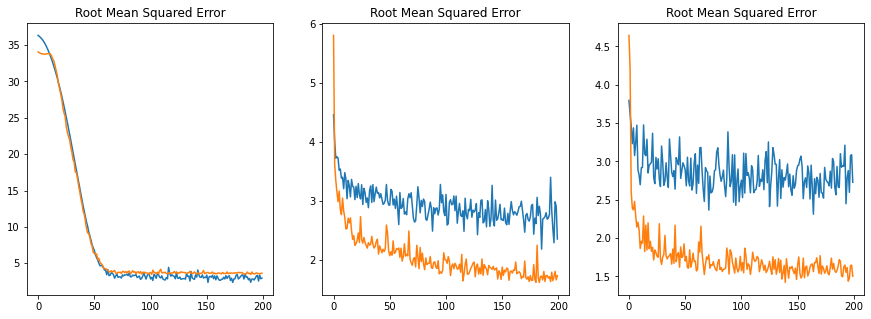

In [63]:
# Plotting Loss And Root Mean Square Error For both Training And Test Sets
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(history1.history['rmse'])
plt.plot(history1.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.subplot(1,3,2)
plt.plot(history2.history['rmse'])
plt.plot(history2.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.subplot(1,3,3)
plt.plot(history3.history['rmse'])
plt.plot(history3.history['val_rmse'])
plt.title('Root Mean Squared Error')
plt.show()

# RMSE during the training and validation

In [64]:
print(history1.history['val_rmse'], history2.history['val_rmse'], history3.history['val_rmse'], sep = '\n\n')

[1.731070637702942, 1.4635895490646362, 1.4723232984542847, 1.7286198139190674, 1.7683260440826416, 1.538948893547058, 1.5697640180587769, 1.5826656818389893, 1.7934093475341797, 1.4329009056091309, 1.6286004781723022, 1.5407685041427612, 1.553349256515503, 1.5171369314193726, 1.4144251346588135, 1.5677272081375122, 1.667151927947998, 1.7038439512252808, 1.6472995281219482, 1.7190349102020264, 1.5029077529907227, 1.5166664123535156, 1.517814040184021, 1.5400282144546509, 1.5251234769821167, 1.6150165796279907, 1.5102280378341675, 1.6599016189575195, 1.5037859678268433, 1.3747197389602661, 1.6029410362243652, 1.404840111732483, 1.579544186592102, 1.7965962886810303, 1.6782951354980469, 1.7990188598632812, 1.6972869634628296, 1.5920437574386597, 1.6085690259933472, 1.5674878358840942, 1.4901435375213623, 1.511410117149353, 1.6178312301635742, 1.589751958847046, 1.4968655109405518, 1.620921015739441, 1.5317320823669434, 1.5749074220657349, 1.4504204988479614, 1.545884132385254, 1.60833084

In [65]:
# Predicting and Finding R Squared Score

ytr_predict = model.predict(X_train)
yte_predict = model.predict(X_test)
ytr_rmse = score(y_train, ytr_predict)
yte_rmse = score(y_test, yte_predict)

print(ytr_rmse, yte_rmse)


1.7829567755342683 2.218283274807545


In [66]:
test = pd.read_csv('../input/cement-train-test-data/test_data.csv')

In [67]:
out = model.predict(sc.transform(test))
out = np.round(out, 4)
out = [x[0] for x in out]
# print(out)
samout = pd.DataFrame({'predicted': out})
samout.to_csv('/kaggle/working/output.csv')

In [68]:
!cat output.csv

,predicted
0,22.436899185180664
1,9.155400276184082
2,80.18190002441406
3,72.85050201416016
4,10.314000129699707
5,44.13090133666992
6,58.51070022583008
7,20.835599899291992
8,65.95189666748047
9,52.20640182495117
10,17.43079948425293
11,46.16270065307617
12,39.659000396728516
13,16.841699600219727
14,62.4379997253418
15,57.870201110839844
16,32.30670166015625
17,35.51369857788086
18,51.53070068359375
19,38.23870086669922
20,60.82379913330078
21,26.69179916381836
22,32.72949981689453
23,42.139198303222656
24,18.010299682617188
25,26.57990074157715
26,68.89820098876953
27,21.48979949951172
28,57.870201110839844
29,66.12349700927734
30,20.882600784301758
31,48.564701080322266
32,24.903499603271484
33,49.43790054321289
34,20.433900833129883
35,6.764699935913086
36,33.807498931884766
37,25.80419921875
38,32.99879837036133
39,28.446800231933594
40,40.672298431396484
41,35.75899887084961
42,30.831300735473633
43,37.51089859008789
44,57.92380142211914
45,32.1260986328125
46,28.949100494384766